In [1]:
from keras.datasets import cifar10, cifar100
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import cv2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

In [2]:
# load CIFAR-10 data
(x_train_10, y_train_10), (x_test_10, y_test_10) = cifar10.load_data()
print("x_train_10 shape:", x_train_10.shape, "y_train_10 shape:", y_train_10.shape)
# load CIFAR-100 data
(x_train_100, y_train_100), (x_test_100, y_test_100) = cifar100.load_data(label_mode='fine')
print("x_train_100 shape:", x_train_100.shape, "y_train_100 shape:", y_train_100.shape)

170498071/170498071 [==============================] - 4s 0us/step
x_train_10 shape: (50000, 32, 32, 3) y_train_10 shape: (50000, 1)
169001437/169001437 [==============================] - 2s 0us/step
x_train_100 shape: (50000, 32, 32, 3) y_train_100 shape: (50000, 1)


In [3]:
class_names_cifar10 = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
cifar_10_classes_needed = ["automobile", "bird", "cat", "deer", "dog","horse", "truck"]

In [4]:
# Create a dictionary mapping numerical labels to class names
label_to_class_name = {i: class_names_cifar10[i] for i in range(len(class_names_cifar10))}
# Apply the mapping to the training and testing labels
y_train_10 = [label_to_class_name[label] for label in y_train_10.flatten()]
y_test_10 = [label_to_class_name[label] for label in y_test_10.flatten()]

In [5]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle','bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle','chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur','dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard','lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain','mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree','plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket','rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider','squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor','train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
classes_needed_cifar100 = ["cattle", "fox", "baby", "boy", "girl", "man", "woman", "rabbit", "squirrel", "maple_tree", "oak_tree", "palm_tree", "pine_tree", "willow_tree", "bicycle", "bus", "motorcycle", "pickup_truck", "train", "lawn_mower", "tractor"]

In [6]:
# Create a dictionary mapping numerical labels to class names
label_to_class_name = {i: class_names[i] for i in range(len(class_names))}
# Apply the mapping to the training and testing labels
y_train_100 = [label_to_class_name[label] for label in y_train_100.flatten()]
y_test_100 = [label_to_class_name[label] for label in y_test_100.flatten()]

In [7]:
# Only keep the images that are in the classes_needed
x_train_10 = x_train_10[np.isin(y_train_10, cifar_10_classes_needed).flatten()]
y_train_10 = np.array(y_train_10)[np.isin(y_train_10, cifar_10_classes_needed).flatten()]
x_test_10 = x_test_10[np.isin(y_test_10, cifar_10_classes_needed).flatten()]
y_test_10 = np.array(y_test_10)[np.isin(y_test_10, cifar_10_classes_needed).flatten()]

In [8]:
# Only keep the images that are in the classes_needed
x_train_100 = x_train_100[np.isin(y_train_100, classes_needed_cifar100).flatten()]
y_train_100 = np.array(y_train_100)[np.isin(y_train_100, classes_needed_cifar100).flatten()]
x_test_100 = x_test_100[np.isin(y_test_100, classes_needed_cifar100).flatten()]
y_test_100 = np.array(y_test_100)[np.isin(y_test_100, classes_needed_cifar100).flatten()]

In [9]:
# Resize the images to 32x32x3
x_train_10 = np.array([cv2.resize(img, (32, 32)) for img in x_train_10])
x_test_10 = np.array([cv2.resize(img, (32, 32)) for img in x_test_10])
x_train_100 = np.array([cv2.resize(img, (32, 32)) for img in x_train_100])
x_test_100 = np.array([cv2.resize(img, (32, 32)) for img in x_test_100])

In [10]:
# Print the shape of the data Before
print(x_train_10.shape, y_train_10.shape, x_test_10.shape, y_test_10.shape)
print(x_train_100.shape, y_train_100.shape, x_test_100.shape, y_test_100.shape)

(35000, 32, 32, 3) (35000,) (7000, 32, 32, 3) (7000,)
(10500, 32, 32, 3) (10500,) (2100, 32, 32, 3) (2100,)


In [11]:
# Join the two datasets
x_train = np.concatenate((x_train_10, x_train_100), axis=0)
y_train = np.concatenate((y_train_10, y_train_100), axis=0)
x_test = np.concatenate((x_test_10, x_test_100), axis=0)
y_test = np.concatenate((y_test_10, y_test_100), axis=0)

In [12]:
# Print the shape of the data After
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(set(y_train))  # This will show all unique classes in your training set

(45500, 32, 32, 3) (45500,) (9100, 32, 32, 3) (9100,)
{'fox', 'rabbit', 'bird', 'motorcycle', 'tractor', 'squirrel', 'bicycle', 'lawn_mower', 'pine_tree', 'willow_tree', 'bus', 'palm_tree', 'maple_tree', 'pickup_truck', 'dog', 'horse', 'train', 'man', 'automobile', 'oak_tree', 'girl', 'deer', 'truck', 'cattle', 'woman', 'boy', 'cat', 'baby'}


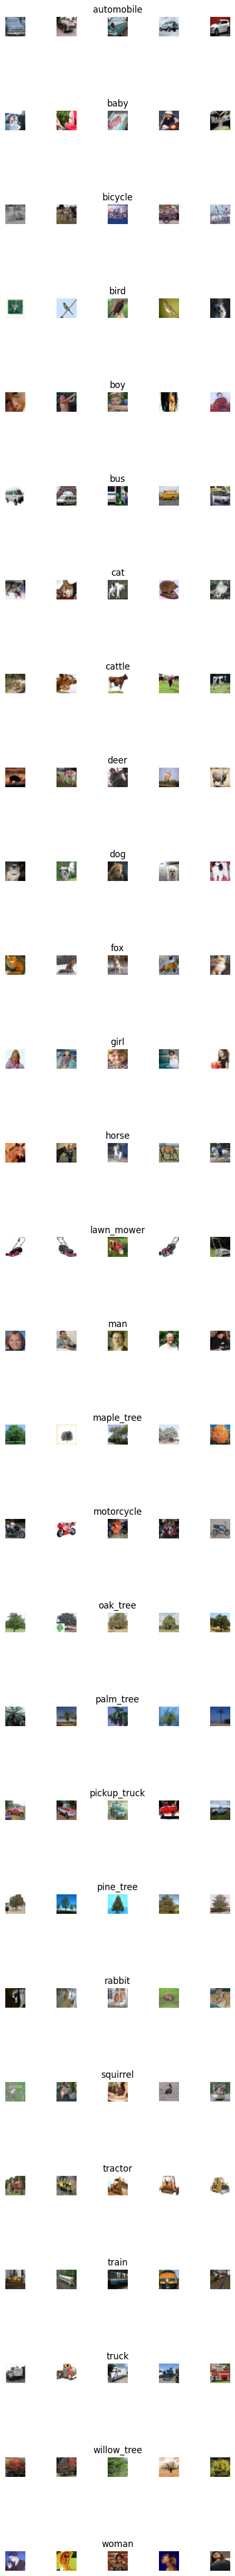

In [13]:
# Visualize the Classes
num_of_samples = []
cols = 5
num_classes = np.unique(y_train)
fig, axs = plt.subplots(nrows=len(num_classes), ncols=cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, label in enumerate(num_classes):
        x_selected = x_train[y_train == label]
        if len(x_selected) > 0:
            img_index = random.randint(0, len(x_selected) - 1)
            axs[j][i].imshow(x_selected[img_index, :, :], cmap=plt.get_cmap('gray'))
            axs[j][i].axis("off")
            if i == 2:
                num_of_samples.append(len(x_selected))
                axs[j][i].set_title(str(label))
plt.show()

In [32]:
#Image Preprocessing

def gaussian_blur(img):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    return img

def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = gaussian_blur(img)
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [15]:
# Preprocess Data
x_train = np.array(list(map(preprocessing, x_train)))
x_test = np.array(list(map(preprocessing, x_test)))

In [16]:
# After preprocessing, add a channel dimension to x_train and x_test
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

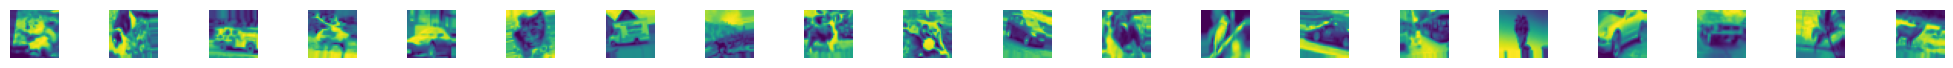

In [33]:
# Data Augmentation & Display
data_generator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
data_generator.fit(x_train)
data_generator.fit(x_test)
batches = data_generator.flow(x_train,y_train,batch_size=20)
X_batch, y_batch = next(batches)
fig, axs = plt.subplots(1,20, figsize=(20,5))
fig.tight_layout()
for i in range(20):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')
plt.show()

In [18]:
#Convert string labels to integer labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)

In [19]:
#Apply to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [20]:
#First Iteration of Our Model Based of the one we used in Class also used in the below article
#https://www.geeksforgeeks.org/image-classification-using-cifar-10-and-cifar-100-dataset-in-tensorflow/
def alpha_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 1), activation='relu'))  # Adjust input_shape here
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Use num_classes here
    model.add(Dropout(0.5))
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(30, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation ='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [22]:
def beta_model():
    model = Sequential()
    # With Batch Normalisation
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # With Dropout
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # With Dropout
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    # With Dropout
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    # With Dropout
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [23]:
# Calculate steps per epoch
steps_per_epoch = x_train.shape[0] // 100
# Fit the model
print("steps_per_epoch: ", steps_per_epoch)

steps_per_epoch:  455


In [24]:
model = beta_model()
model.summary()
history = model.fit(x_train, y_train, steps_per_epoch = x_train.shape[0]/267.5,
                     epochs=20, validation_data=(x_test, y_test),
                    batch_size=200, verbose=1, shuffle=1)
# history = model.fit(data_generator.flow(x_train, y_train, batch_size=200),
#                     steps_per_epoch = x_train.shape[0]/267.5,
#                      epochs=30, validation_data=(x_test, y_test),
#                      verbose=1, shuffle=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                        

In [25]:
# Evaluate the model
print("Evaluate the model on test data")
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

# Evaluate the model
print("Evaluate the model on train data")
score = model.evaluate(x_train, y_train, verbose=0)
print('Train Loss:', score[0])
print('Train accuracy:', score[1])

Evaluate the model on test data
Test Loss: 2.23081111907959
Test accuracy: 0.5537362694740295
Evaluate the model on train data
Train Loss: 0.09638918936252594
Train accuracy: 0.9747912287712097


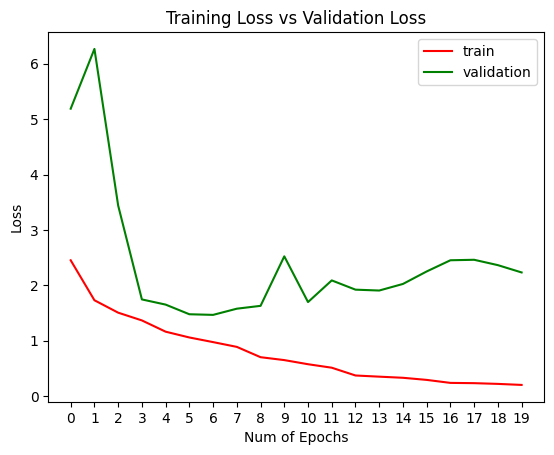

In [26]:
# Plotting our loss charts
plt.figure(0)
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train', 'validation'])
plt.show()

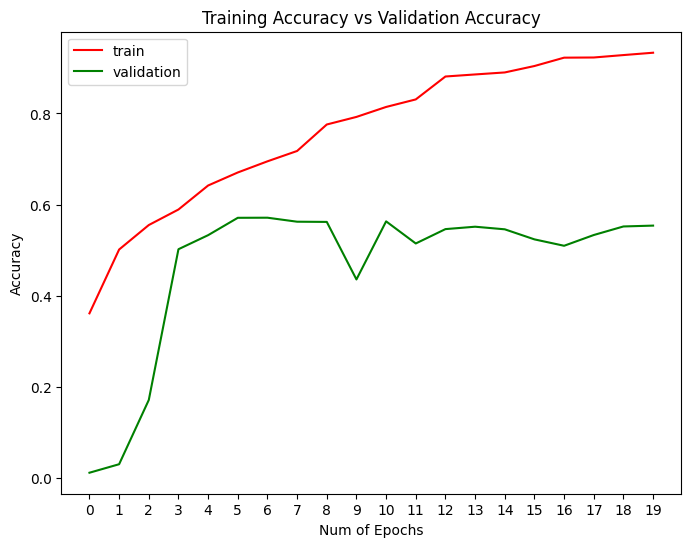

In [27]:
# Plotting our accuracy charts
plt.figure(1)
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train', 'validation'])
plt.show()

In [28]:
# Initialize the dictionary for counting classes
# Convert labels in label_encoder.classes_ to integers if they are not already
class_indices = range(len(label_encoder.classes_))  # Assuming label_encoder.classes_ are in order
class_counts = {label_index: 0 for label_index in class_indices}

# Count the number of images in each class
for label_array in y_test:
    label = np.argmax(label_array)  # Extracting the label index
    class_counts[label] += 1

# Convert counts to a list for plotting
labels = label_encoder.classes_  # Class names
counts = [class_counts[index] for index in class_indices]

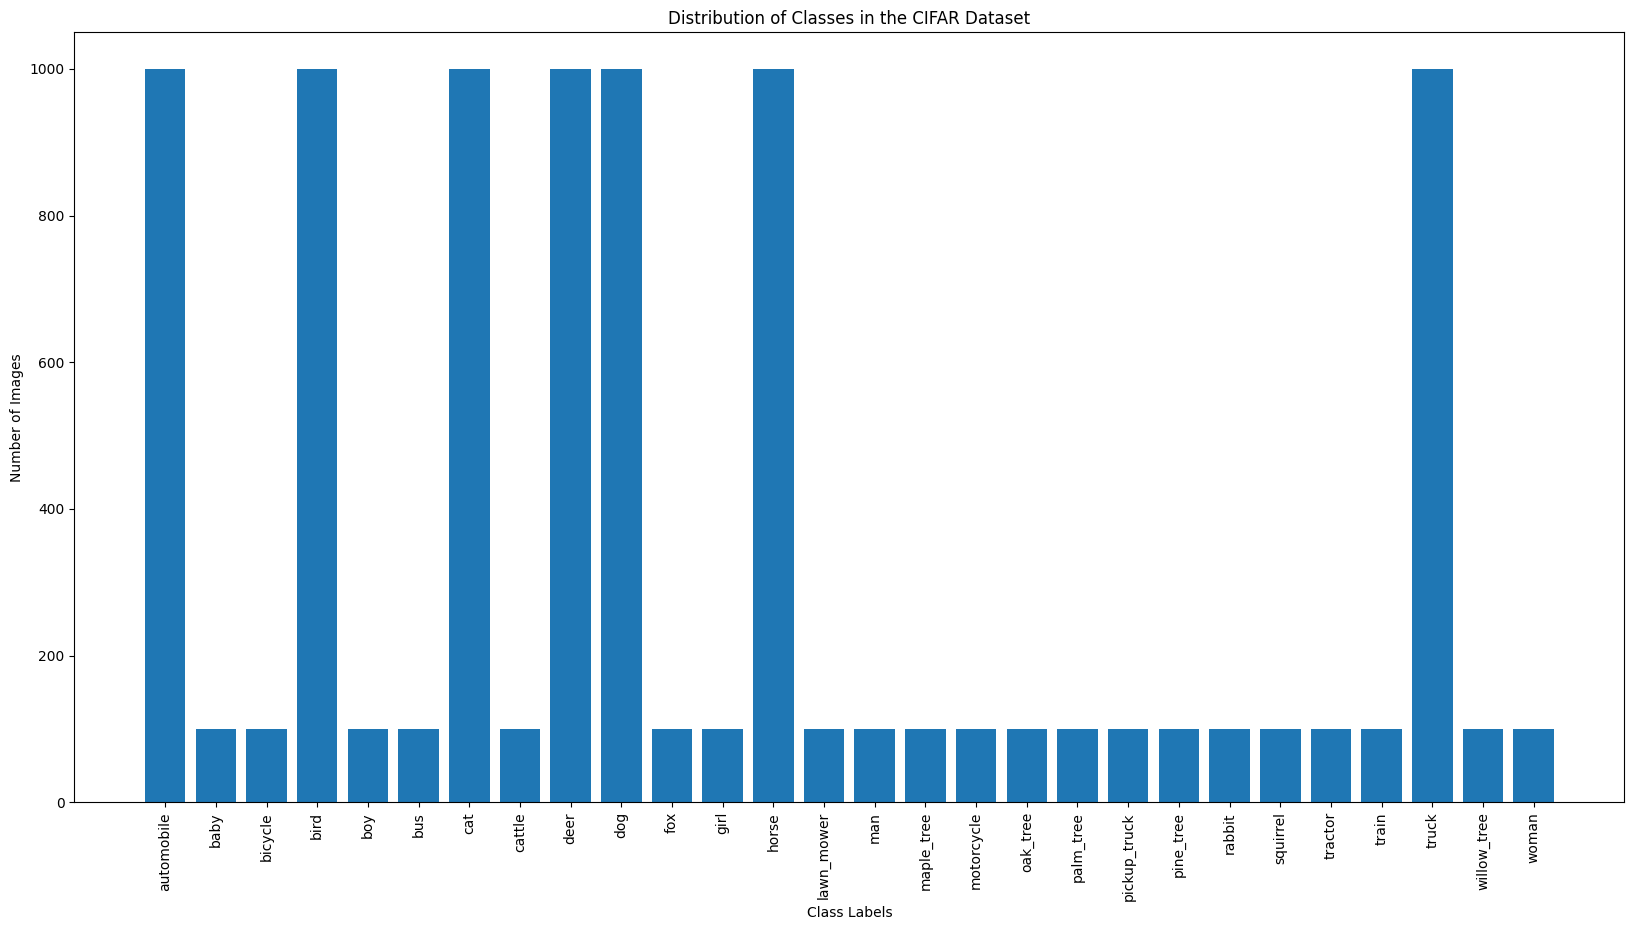

In [29]:
# Plotting
plt.figure(figsize=(20, 10))
plt.bar(labels, counts)
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in the CIFAR Dataset')
plt.xticks(labels, rotation=90)
plt.show()

In [30]:
# Predictions
predictions = model.predict(x_train)
predicted_labels = np.argmax(predictions, axis=1)

1422/1422 [==============================] - 26s 18ms/step


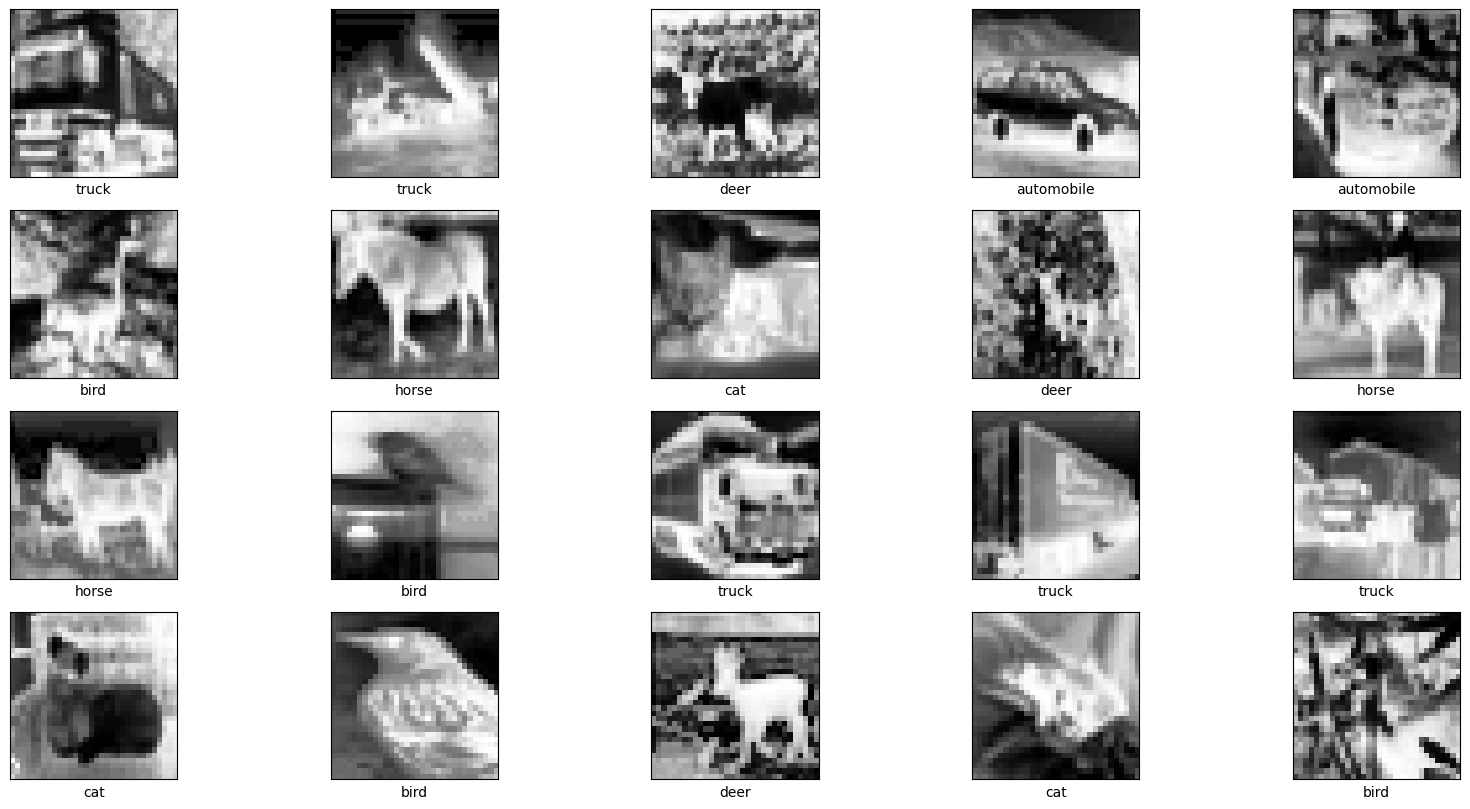

In [31]:
# Visualise predictions with classes
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_encoder.classes_[predicted_labels[i]])
plt.show()